# Computer Lab 1: k-NN classifier

## Exercise 1 – Synthetic dataset 
 
In this exercise, you will employ a synthetic dataset (file `synthetic.mat` in `/data/` folder), containing labelled training data and test data for two classes. Each example is 2-dimensional. 
 
**Task**: your task is to implement a k-NN classifier in Matlab, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest  probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly).
 
In particular, you should perform the following:
* Train a k-NN classifier for different values of k. 
* Compare accuracy on the training set and the test set. Calculating accuracy of the training  set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. 
    * Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. 
* Identifying overfitting and underfitting in the obtained results. 
 
Note that, for this computer lab, you do not need to employ a validation set.

## k-NN Classifier: Theory

* Classification
* k-NN: k-th Nearest Neighboors
    * Metrics

In [76]:
import matplotlib
import numpy as np
import os
import pandas as pd
import scipy.io
import seaborn as sns

# Plots
sns.set_context(
    'talk', rc = {
        'font.size': 12.0,
        'axes.labelsize': 10.0,
        'axes.titlesize': 10.0,
        'xtick.labelsize': 10.0,
        'ytick.labelsize': 10.0,
        'legend.fontsize': 10.0,
        'legend.title_fontsize': 12.0,
        'patch.linewidth': 2.0
        }
    ) # 'paper'

In [77]:
# Check current folder
os.getcwd()

'/'

In [78]:
data_path = '/Users/ernestocolacrai/Documents/GitHub/StatisticalLearning/data/synthetic.mat'

try:
    data = scipy.io.loadmat(data_path)
    print(f"Data ✓")
    print(f"Data Keys: {data.keys()}")
except:
    print(f"Not found data! ({data_path})")

Data ✓
Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'knnClassify2dTest', 'knnClassify2dTrain'])


In [79]:
data_df = {}

for d_type in ['Train', 'Test']:
    data_df[d_type] = pd.DataFrame(
        {'x': data[f'knnClassify2d{d_type}'][:,0],
        'y': data[f'knnClassify2d{d_type}'][:,1],
        'label': data[f'knnClassify2d{d_type}'][:,2]
        }
    )
    print(f"{d_type} ✓")

Train ✓
Test ✓


In [80]:
# Check for NaN values
for d_type in ['Train', 'Test']:
    print(f"{d_type}:\n{data_df[f'{d_type}'].isna().sum(axis=0)}\n")

Train:
x        0
y        0
label    0
dtype: int64

Test:
x        0
y        0
label    0
dtype: int64



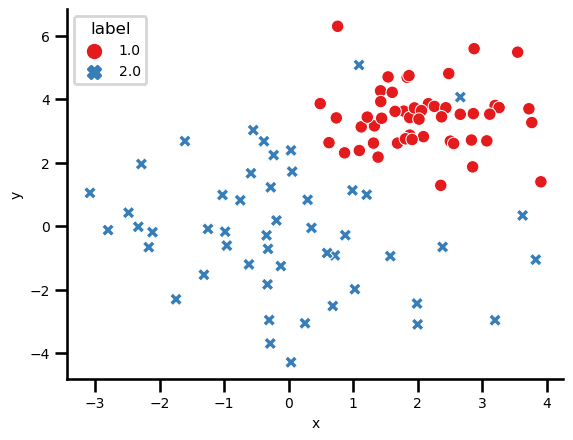

In [98]:
sns.scatterplot(
    data=data_df['Train'],
    x='x', y='y',
    hue='label', style='label',
    legend=True,
    palette="Set1"
)
sns.despine(right=True)